In [1]:
import pandas as pd
import numpy as np
import os
import glob
from config import load_config
paths = load_config(dataset_key='all')
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import h5py
import json

Paths are for dataset tagged: all


In [3]:
# Load HSFP preprocessed hdf5 file 
#f = h5py.File('Z:\smrithi.sunil\data-upload\HSFP_750101_2024-11-08_10-17-44\\fib\hsfp_data_preprocessed.hdf5','r')
f = h5py.File('Z:\\smrithi.sunil\\data-upload\HSFP_741062_2024-11-06_10-35-49\\fib\\hsfp_data_preprocessed_noisereg.hdf5','r')
time_405 = np.array(f['Time_405'])
time_445 = np.array(f['Time_445'])
time_473 = np.array(f['Time_473'])
time_514 = np.array(f['Time_514'])
time_560 = np.array(f['Time_560'])
timestamps = np.array(f['Full_TimeStamps'])
lasers = np.array(f['Lasers'])
wavelength = np.array(f['Wavelength'])
L_405_F1 = np.array(f['Channel_405_F1'])
L_405_F2 = np.array(f['Channel_405_F2'])
L_445_F1 = np.array(f['Channel_445_F1'])
L_445_F2 = np.array(f['Channel_445_F2'])
L_473_F1 = np.array(f['Channel_473_F1'])
L_473_F2 = np.array(f['Channel_473_F2'])
L_514_F1 = np.array(f['Channel_514_F1'])
L_514_F2 = np.array(f['Channel_514_F2'])
L_560_F1 = np.array(f['Channel_560_F1'])
L_560_F2 = np.array(f['Channel_560_F2'])

0.008509759827804348
0.011312809116244367


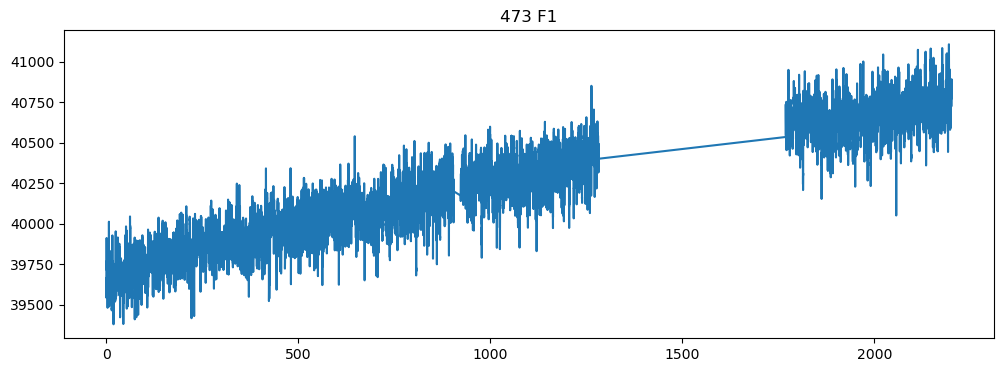

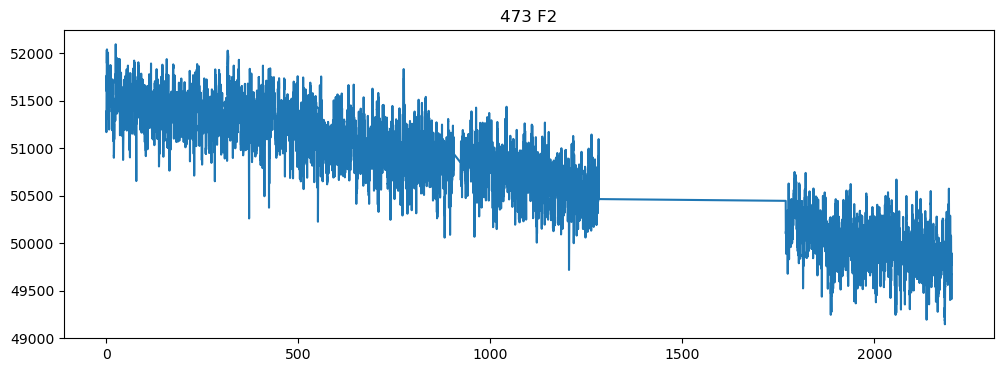

In [3]:

def plot_signal(time, signal, title):
    plt.figure()
    fig = plt.gcf()
    fig.set_size_inches(12, 4)
    plt.plot(time, signal)
    plt.title(title)
    #plt.xlim(0,10)
    plt.show()

data = L_473_F1[:,473-400]
ndata = data/np.mean(data)
fluctuation = ndata - np.mean(ndata)
rms = np.sqrt(np.mean(fluctuation**2))
print(rms)
data = L_473_F2[:,473-400]
ndata = data/np.mean(data)
fluctuation = ndata - np.mean(ndata)
rms = np.sqrt(np.mean(fluctuation**2))
print(rms)

plot_signal(time_473-time_473[0], L_473_F1[:,473-400], '473 F1')
plot_signal(time_473-time_473[0], L_473_F2[:,473-400], '473 F2')



0.007345217884012448
0.013386274151695104
0.011153265770247544


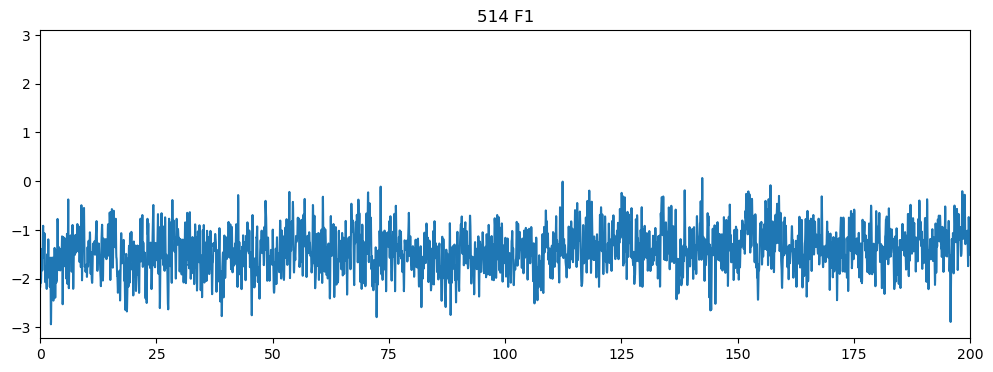

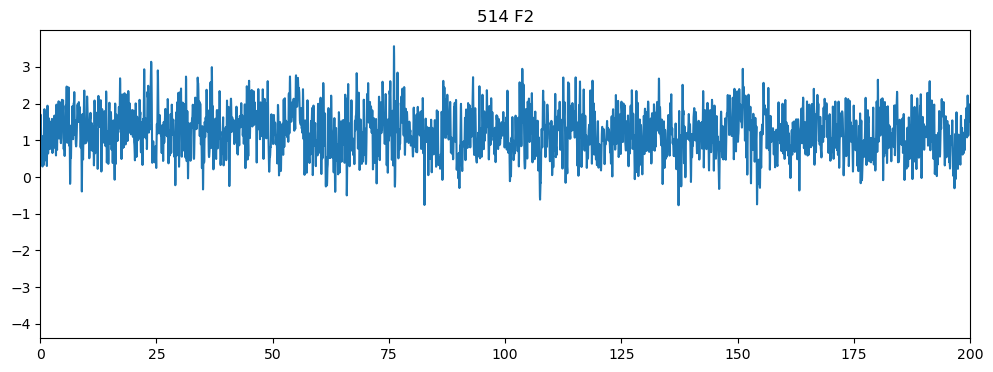

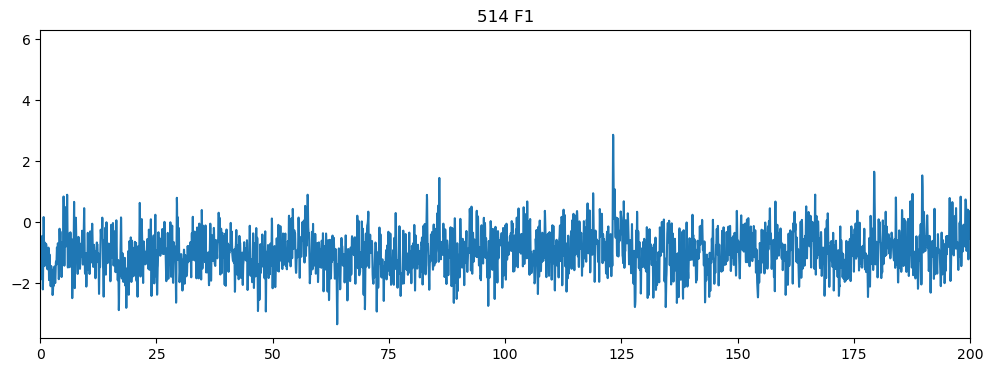

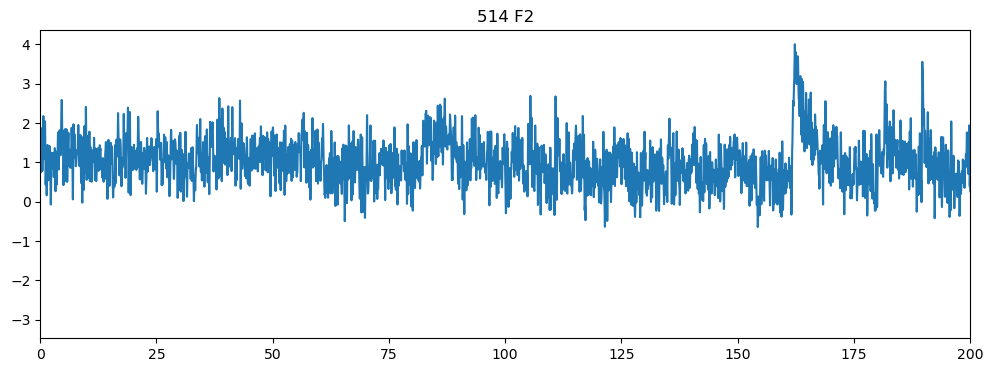

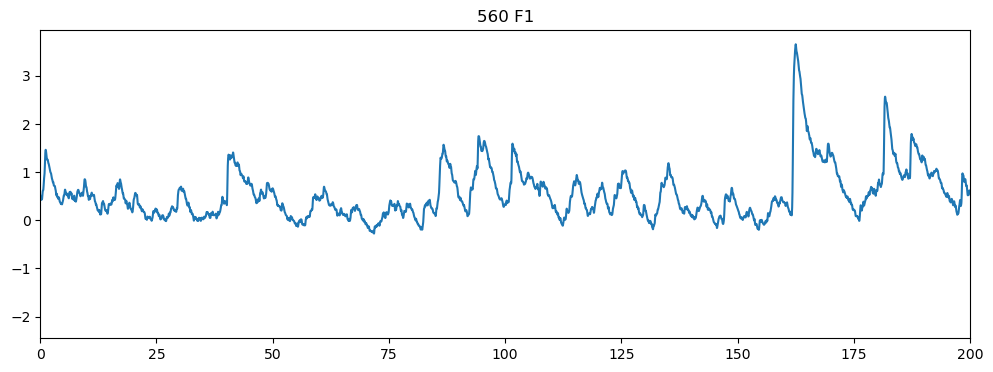

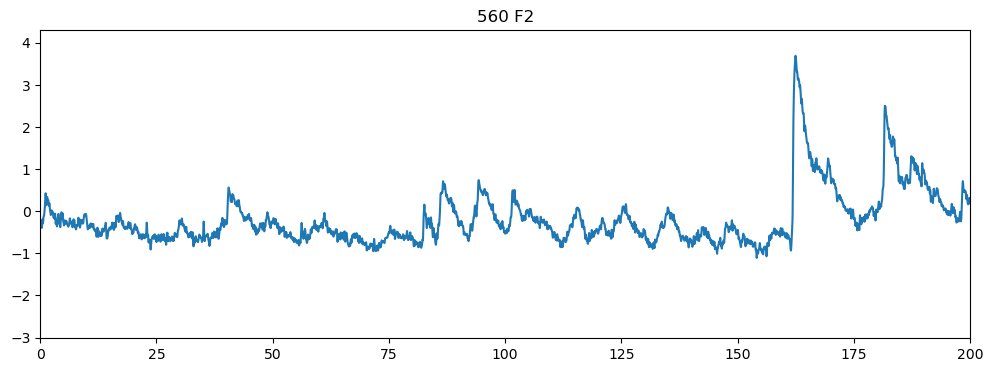

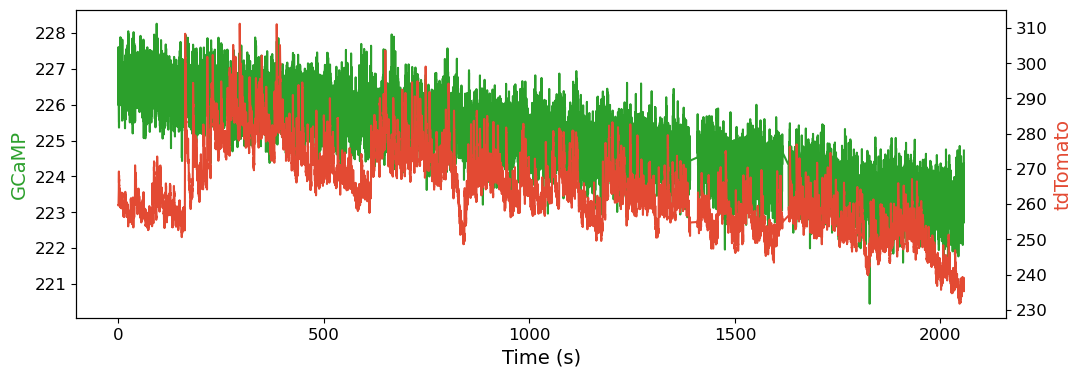

In [13]:
# f,ax = plt.subplots(figsize=(6,2))
# norm_time = time_560 - time_560[0]
# i = ax.imshow(np.transpose(L_560_F2), aspect='auto', vmin=0, vmax=500, 
#               extent=[np.min(norm_time), np.max(norm_time), 699, 400])
# ax.set(xlabel='Time (sec)', ylabel='Wavelength', title='560 nm', ylim=[400,699])
# ax.grid(False)
# f.colorbar(i,ax=ax)
# plt.show()

def plot_signal(time, signal, title):
    signal = np.mean(signal, axis=1)
    Z = (signal - np.mean(signal))/np.std(signal)
    plt.figure()
    fig = plt.gcf()
    fig.set_size_inches(12, 4)
    plt.plot(time, Z)
    plt.title(title)
    plt.xlim(0,200)
    plt.show()

data = L_473_F1[:,473-400]
ndata = data/np.mean(data)
fluctuation = ndata - np.mean(ndata)
rms = np.sqrt(np.mean(fluctuation**2))
print(rms)
data = L_473_F2[:,473-400]
ndata = data/np.mean(data)
fluctuation = ndata - np.mean(ndata)
rms = np.sqrt(np.mean(fluctuation**2))
print(rms)
data = L_473_F2[:,540-400]
ndata = data/np.mean(data)
fluctuation = ndata - np.mean(ndata)
rms = np.sqrt(np.mean(fluctuation**2))
print(rms)

# plot_signal(time_405-time_405[0], L_405_F1[:,490-400:505-400], '405 F1')
# plot_signal(time_405-time_405[0], L_405_F2[:,490-400:505-400], '405 F2')
# plot_signal(time_445-time_445[0], L_445_F1[:,525-400:545-400], '445 F1')
# plot_signal(time_445-time_445[0], L_445_F2[:,525-400:545-400], '445 F2')
# plot_signal(time_473-time_473[0], L_473_F1[:,490-400:510-400], '473 F1')
# plot_signal(time_473-time_473[0], L_473_F2[:,472-400:474-400], '473 F2')
# plot_signal(time_473-time_473[0], L_473_F2[:,490-400:510-400], '473 F2')
# plot_signal(time_473-time_473[0], L_473_F2[:,580-400:610-400], '473 F2')
plot_signal(time_514-time_514[0], L_514_F1[:,530-400:535-400], '514 F1')
plot_signal(time_514-time_514[0], L_514_F2[:,530-400:535-400], '514 F2')
plot_signal(time_514-time_514[0], L_514_F1[:,540-400:550-400], '514 F1')
plot_signal(time_514-time_514[0], L_514_F2[:,540-400:550-400], '514 F2')
plot_signal(time_560-time_560[0], L_560_F1[:,600-400:615-400], '560 F1')
plot_signal(time_560-time_560[0], L_560_F2[:,600-400:615-400], '560 F2')

# plt.figure()
# fig = plt.gcf()
# fig.set_size_inches(12, 4)
# plt.plot(time_473-time_473[0], L_473_F1[:,500-400]/np.mean(L_473_F1[:,500-400]))
# plt.plot(time_514-time_514[0], L_514_F1[:,540-400]/np.mean(L_514_F1[:,540-400]))
# plt.plot(time_560-time_560[0], L_560_F1[:,600-400]/np.mean(L_560_F1[:,600-400]))
# plt.xlim(200,250)
# plt.show()

fig, ax1 = plt.subplots()
fig.set_size_inches(12, 4)
# Plot Ca and ACh on the first y-axis
sig = L_514_F2[:,530-400:550-400]
signal = np.mean(sig, axis=1)
Z1 = signal # (signal - np.mean(signal))/np.std(signal)
ax1.plot(time_514-time_514[0], Z1, color='#2ca02c')
ax1.set_xlabel('Time (s)', fontsize=14)
ax1.set_ylabel('GCaMP', color='#2ca02c', fontsize=14)
ax1.tick_params('y', color='black', labelsize=12)
ax1.tick_params('x', labelsize=12)
#ax1.set_ylim(300,410)
# Create a second y-axis for Da
ax2 = ax1.twinx()
sig = L_560_F2[:,590-400:610-400]
signal = np.mean(sig, axis=1)
Z2 = signal # (signal - np.mean(signal))/np.std(signal)
ax2.plot(time_560-time_560[0], Z2, color='#e34a33')
ax2.set_ylabel('tdTomato', color='#e34a33', fontsize=14)
ax2.tick_params('y', color='black', labelsize=12)
#ax2.set_ylim(1920,2200)
#plt.xlim(250,350)
# plt.xlim()
plt.show()


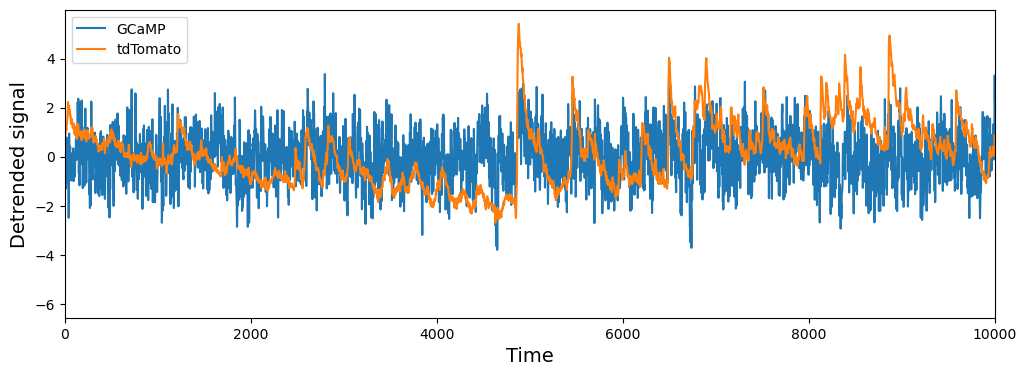

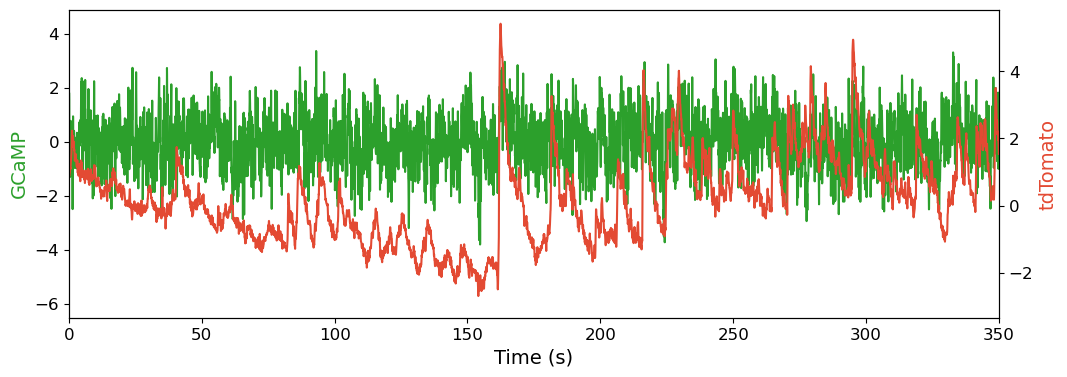

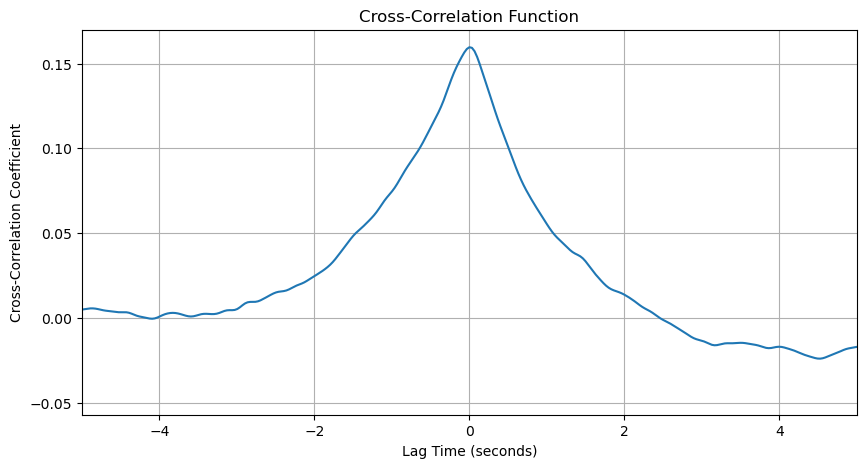

In [16]:
# Detrend Z1 and Z2

def detrend_signal(signal):
    x = np.arange(len(signal))
    p = np.polyfit(x,signal,4)
    y = np.polyval(p,x)
    signal_detrended = signal - y + np.mean(signal)
    return signal_detrended

# Normalize the signals
Z1 = (Z1 - np.mean(Z1))/np.std(Z1)
Z2 = (Z2 - np.mean(Z2))/np.std(Z2)

Z1 = detrend_signal(Z1)
Z2 = detrend_signal(Z2)

# Plot the detrended signals
fig, ax = plt.subplots()
fig.set_size_inches(12, 4)
ax.plot(Z1, label='GCaMP')
ax.plot(Z2, label='tdTomato')
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Detrended signal', fontsize=14)
ax.legend()
ax.set_xlim(0, 10000)
plt.show()

fig, ax1 = plt.subplots()
fig.set_size_inches(12, 4)
# Plot Ca and ACh on the first y-axis
ax1.plot(time_514-time_514[0], Z1, color='#2ca02c')
ax1.set_xlabel('Time (s)', fontsize=14)
ax1.set_ylabel('GCaMP', color='#2ca02c', fontsize=14)
ax1.tick_params('y', color='black', labelsize=12)
ax1.tick_params('x', labelsize=12)
#ax1.set_ylim(300,410)
# Create a second y-axis for Da
ax2 = ax1.twinx()
ax2.plot(time_560-time_560[0], Z2, color='#e34a33')
ax2.set_ylabel('tdTomato', color='#e34a33', fontsize=14)
ax2.tick_params('y', color='black', labelsize=12)
#ax2.set_ylim(1920,2200)
plt.xlim(0,350)
# plt.xlim()
plt.show()

# Compute the cross-correlation
from scipy.signal import correlate
# Compute cross-correlation
cross_corr = correlate(Z1, Z2, mode='full')
lags = np.arange(-len(Z1) + 1, len(Z2))
delta_t = 1 / 30.05  # Sampling interval
lag_times = lags * delta_t
n = len(Z1)
cross_corr_coeff = cross_corr / (n)
# Plot cross-correlation
plt.figure(figsize=(10, 5))
plt.plot(lag_times, cross_corr_coeff)
plt.title('Cross-Correlation Function')
plt.xlabel('Lag Time (seconds)')
plt.ylabel('Cross-Correlation Coefficient')
plt.xlim(-5, 5)
plt.grid(True)
plt.show()

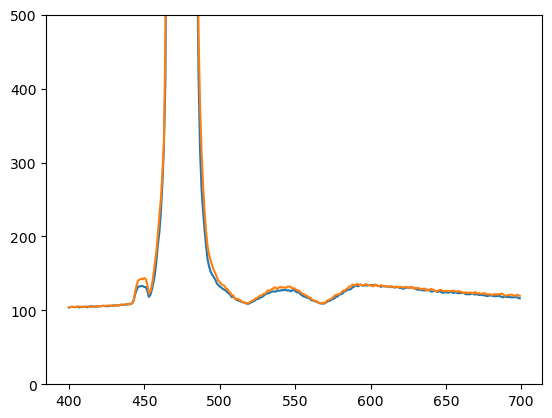

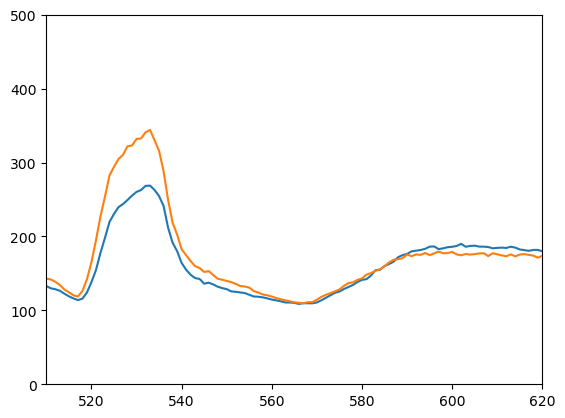

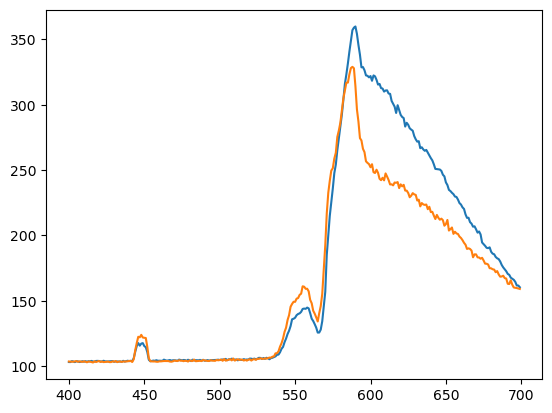

In [7]:
plt.figure()
plt.plot(wavelength, L_473_F1[100,:])
plt.plot(wavelength, L_473_F2[100,:])
# plt.xlim(510,560)
plt.ylim(0,500)
plt.show()

plt.figure()
plt.plot(wavelength, L_514_F1[100,:])
plt.plot(wavelength, L_514_F2[100,:])
plt.xlim(510,620)
plt.ylim(0,500)
plt.show()

plt.figure()
plt.plot(wavelength, L_560_F1[100,:])
plt.plot(wavelength, L_560_F2[100,:])
#plt.xlim(560,650)
#plt.ylim(0,500)
plt.show()


In [7]:
# Detrend the data with a fourth order polynomial and extract indicator signals

# Load HSFP preprocessed hdf5 file 
from config import load_config
paths = load_config(dataset_key='all')

f = h5py.File(paths['raw_data'] / 'hsfp_data_preprocessed.hdf5','r')
time_405 = np.array(f['Time_405'])
time_445 = np.array(f['Time_445'])
time_473 = np.array(f['Time_473'])
time_514 = np.array(f['Time_514'])
time_560 = np.array(f['Time_560'])
timestamps = np.array(f['Full_TimeStamps'])
lasers = np.array(f['Lasers'])
wavelength = np.array(f['Wavelength'])
L_405_F1 = np.array(f['Channel_405_F1'])
L_405_F2 = np.array(f['Channel_405_F2'])
L_445_F1 = np.array(f['Channel_445_F1'])
L_445_F2 = np.array(f['Channel_445_F2'])
L_473_F1 = np.array(f['Channel_473_F1'])
L_473_F2 = np.array(f['Channel_473_F2'])
L_514_F1 = np.array(f['Channel_514_F1'])
L_514_F2 = np.array(f['Channel_514_F2'])
L_560_F1 = np.array(f['Channel_560_F1'])
L_560_F2 = np.array(f['Channel_560_F2'])



Paths are for dataset tagged: all


In [8]:
def detrend_signal(signal):
    x = np.arange(len(signal))
    p = np.polyfit(x,signal,4)
    y = np.polyval(p,x)
    signal_detrended = signal - y + np.mean(signal)
    return signal_detrended

L_405_F1_detrend = np.zeros(np.shape(L_405_F1))
L_405_F2_detrend = np.zeros(np.shape(L_405_F2))
L_445_F1_detrend = np.zeros(np.shape(L_445_F1))
L_445_F2_detrend = np.zeros(np.shape(L_445_F2))
L_473_F1_detrend = np.zeros(np.shape(L_473_F1))
L_473_F2_detrend = np.zeros(np.shape(L_473_F2))
L_514_F1_detrend = np.zeros(np.shape(L_514_F1))
L_514_F2_detrend = np.zeros(np.shape(L_514_F2))
L_560_F1_detrend = np.zeros(np.shape(L_560_F1))
L_560_F2_detrend = np.zeros(np.shape(L_560_F2))
for i in range(len(L_560_F2[0,:])):
    L_405_F1_detrend[:,i] = detrend_signal(L_405_F1[:,i])
    L_405_F2_detrend[:,i] = detrend_signal(L_405_F2[:,i])
    L_445_F1_detrend[:,i] = detrend_signal(L_445_F1[:,i])
    L_445_F2_detrend[:,i] = detrend_signal(L_445_F2[:,i])
    L_473_F1_detrend[:,i] = detrend_signal(L_473_F1[:,i])
    L_473_F2_detrend[:,i] = detrend_signal(L_473_F2[:,i])
    L_514_F1_detrend[:,i] = detrend_signal(L_514_F1[:,i])
    L_514_F2_detrend[:,i] = detrend_signal(L_514_F2[:,i])
    L_560_F1_detrend[:,i] = detrend_signal(L_560_F1[:,i])
    L_560_F2_detrend[:,i] = detrend_signal(L_560_F2[:,i])

In [9]:
Ca_F1 = np.mean(L_473_F1_detrend[:,490-400:505-400], axis=1)
Ca_F2 = np.mean(L_473_F2_detrend[:,490-400:505-400], axis=1)
Ach_F1 = np.mean(L_514_F1_detrend[:,525-400:535-400], axis=1)
Ach_F2 = np.mean(L_514_F2_detrend[:,525-400:535-400], axis=1)
OCamp_F1 = np.mean(L_514_F1_detrend[:,545-400:555-400], axis=1)
OCamp_F2 = np.mean(L_514_F2_detrend[:,545-400:555-400], axis=1)
Da_F1 = np.mean(L_560_F1_detrend[:,590-400:610-400], axis=1)
Da_F2 = np.mean(L_560_F2_detrend[:,590-400:610-400], axis=1)

In [ ]:
def plot_signal(time, signal1, signal2):
    plt.figure()
    fig = plt.gcf()
    fig.set_size_inches(12, 4)
    plt.plot(time, signal1)
    plt.plot(time, signal2)
    #plt.xlim(600,900)
    plt.show()

plot_signal(time_473-time_473[0], Ca_F1, Ca_F2)
plot_signal(time_514-time_514[0], Ach_F1, Ach_F2)
plot_signal(time_514-time_514[0], OCamp_F1, OCamp_F2)
plot_signal(time_560-time_560[0], Da_F1, Da_F2)


In [10]:
# Save preprocessed data in hdf5 file

data_preprocessed = {'Time_Ca':time_473, 'Time_Ach':time_514, 'Time_Da':time_560, 
                     'Ca_F1':Ca_F1, 'Ca_F2':Ca_F2, 'Ach_F1':Ach_F1, 'Ach_F2':Ach_F2,
                     'Da_F1':Da_F1, 'Da_F2':Da_F2}
                        
for key in data_preprocessed.keys():
    print(f'\n{key}')
    print(data_preprocessed[key])

# Write a new hdf5 file with all keys in data_preprocessed
hf = h5py.File(paths['raw_data'] / 'hsfp_data_preprocessed_indicators.hdf5','w')
for key in data_preprocessed.keys():
    hf.create_dataset(key, data = data_preprocessed[key])
hf.close()


Time_Ca
[1.73135482e+09 1.73135482e+09 1.73135482e+09 ... 1.73135660e+09
 1.73135660e+09 1.73135660e+09]

Time_Ach
[1.73135482e+09 1.73135482e+09 1.73135482e+09 ... 1.73135660e+09
 1.73135660e+09 1.73135660e+09]

Time_Da
[1.73135482e+09 1.73135482e+09 1.73135482e+09 ... 1.73135660e+09
 1.73135660e+09 1.73135660e+09]

Ca_F1
[201.1273576  202.18279598 202.75775585 ... 200.10002584 200.13123144
 200.34659431]

Ca_F2
[252.7069533  254.09413995 255.03209217 ... 249.85246869 250.08727047
 250.60626342]

Ach_F1
[290.89557837 293.19412146 294.31308304 ... 291.53114106 290.63211023
 289.64256833]

Ach_F2
[336.659659   335.64616383 334.9819137  ... 338.35612727 337.86136366
 337.05044763]

Da_F1
[232.19178369 231.57709852 231.31519509 ... 221.24631094 221.12625741
 221.06681097]

Da_F2
[261.55498755 263.12270219 264.56995747 ... 254.79870622 254.61278565
 254.5775447 ]


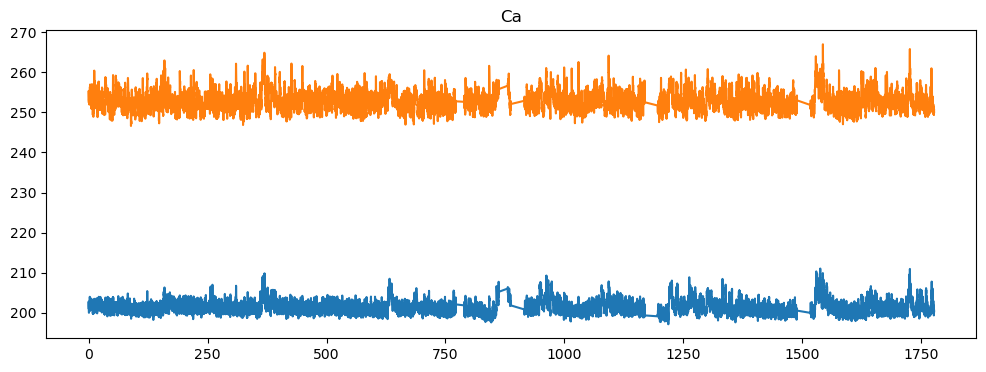

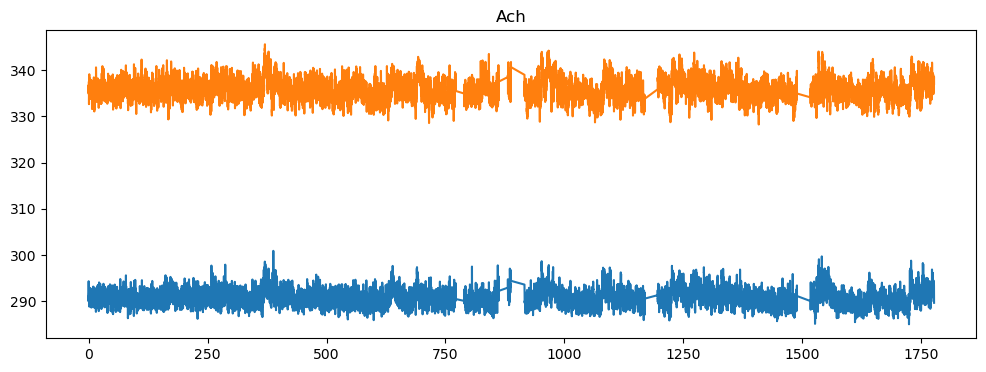

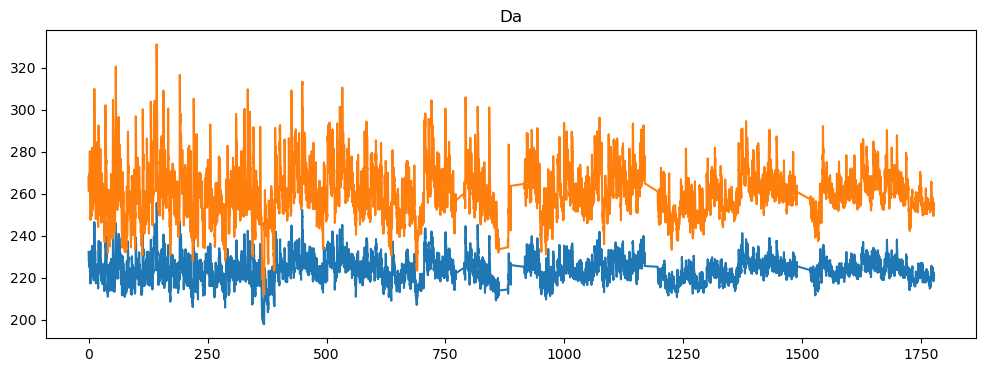

In [ ]:
# f = h5py.File(paths['raw_data'] / 'hsfp_data_preprocessed_indicators.hdf5','r')
f = h5py.File('Z:\\smrithi.sunil\\data-upload\HSFP_741062_2024-11-06_10-35-49\\fib\\hsfp_data_preprocessed_indicators.hdf5','r')
time_Ca = np.array(f['Time_Ca'])
time_Ach = np.array(f['Time_Ach'])
time_Da = np.array(f['Time_Da'])
Ca_F1 = np.array(f['Ca_F1'])
Ca_F2 = np.array(f['Ca_F2'])
Ach_F1 = np.array(f['Ach_F1'])
Ach_F2 = np.array(f['Ach_F2'])
Da_F1 = np.array(f['Da_F1'])
Da_F2 = np.array(f['Da_F2'])

# Plot signals
def plot_signal(time, signal1, signal2, title):
    plt.figure()
    fig = plt.gcf()
    fig.set_size_inches(12, 4)
    plt.plot(time, signal1)
    plt.plot(time, signal2)
    plt.title(title)
    plt.show()

plot_signal(time_Ca-time_Ca[0], Ca_F1, Ca_F2, 'Ca')
plot_signal(time_Ach-time_Ach[0], Ach_F1, Ach_F2, 'Ach')
plot_signal(time_Da-time_Da[0], Da_F1, Da_F2, 'Da')


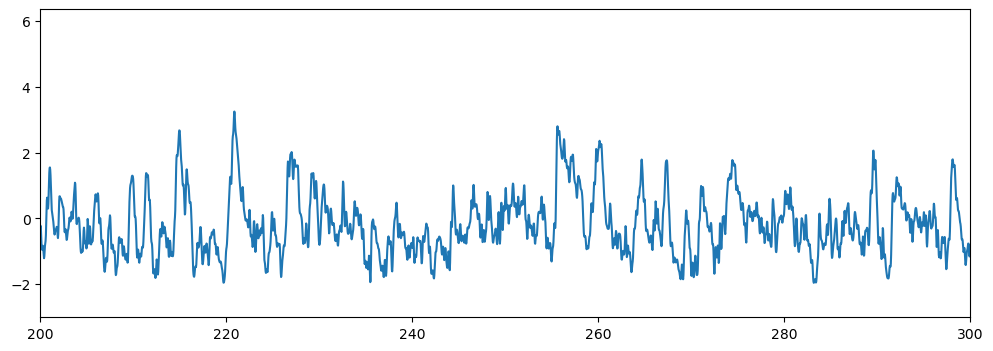

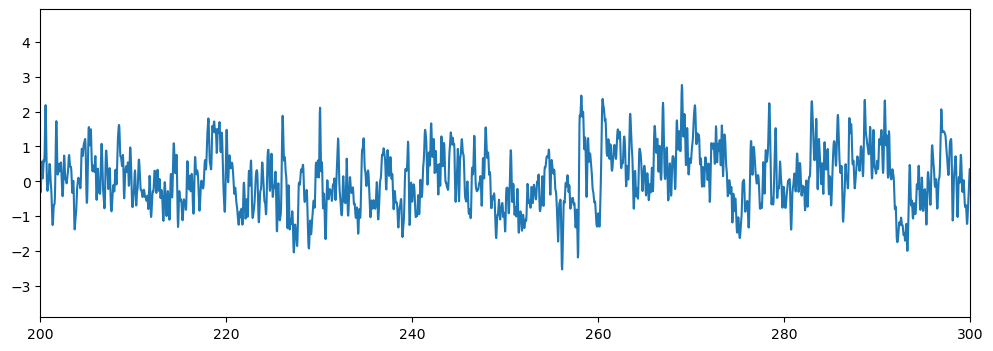

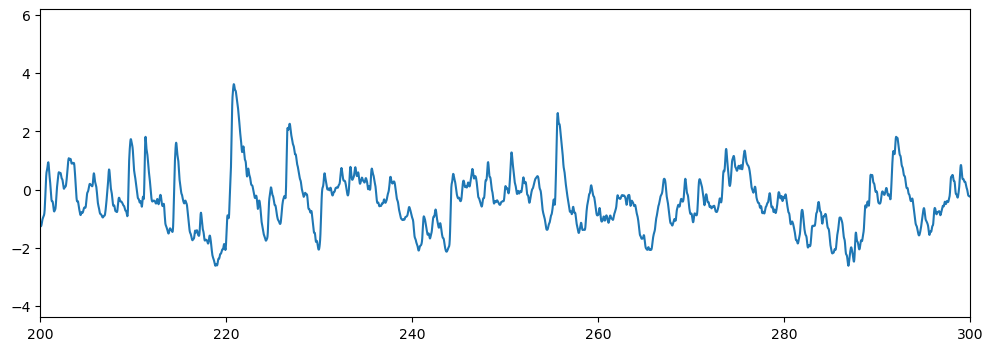

In [12]:
# Plot the delta F/F of indicators

def zscore(signal):
    z_score = (signal - np.mean(signal))/np.std(signal)
    return z_score

Ca_F1_zscore = zscore(Ca_F1)
Ca_F2_zscore = zscore(Ca_F2)
Ach_F1_zscore = zscore(Ach_F1)
Ach_F2_zscore = zscore(Ach_F2)
Da_F1_zscore = zscore(Da_F1)
Da_F2_zscore = zscore(Da_F2)


def plot_signal(time, signal1):
    plt.figure()
    fig = plt.gcf()
    fig.set_size_inches(12, 4)
    plt.plot(time, signal1)
    plt.xlim(200,300)
    plt.show()

plot_signal(time_Ca-time_Ca[0], Ca_F2_zscore)
plot_signal(time_Ach-time_Ach[0], Ach_F2_zscore)
plot_signal(time_Da-time_Da[0], Da_F2_zscore)



In [13]:
# Low pass filter the signal for long time scale plotting 

from scipy import signal

def butter_lowpass(cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

# Low pass filter the signal
fps = 150.25/5 # 24 for pre-2024
pass_freq = 5

def lowpass_signal(sig, pass_freq, fps):
    new_sig = butter_lowpass_filter(sig,pass_freq,fps)
    return new_sig

Ca_F2_lowpass = lowpass_signal(Ca_F2_zscore, pass_freq, fps)
Ach_F2_lowpass = lowpass_signal(Ach_F2_zscore, pass_freq, fps)
Da_F2_lowpass = lowpass_signal(Da_F2_zscore, pass_freq, fps)

pass_freq = 5
Ca_F2_lowpass_2 = Ca_F2_zscore #lowpass_signal(Ca_F2_zscore, pass_freq, fps)
Ach_F2_lowpass_2 = Ach_F2_zscore #lowpass_signal(Ach_F2_zscore, pass_freq, fps)
Da_F2_lowpass_2 = Da_F2_zscore #lowpass_signal(Da_F2_zscore, pass_freq, fps)


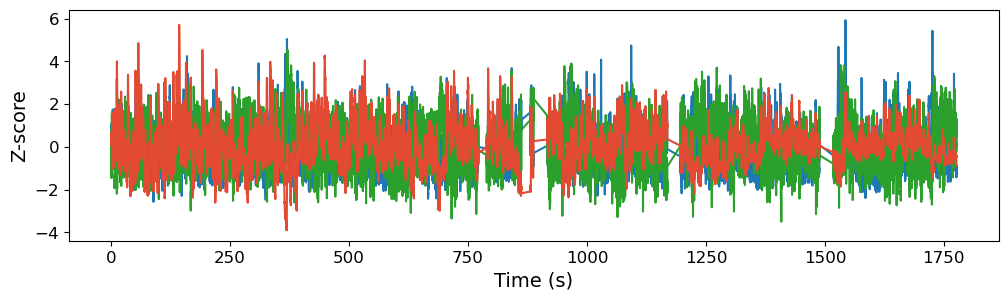

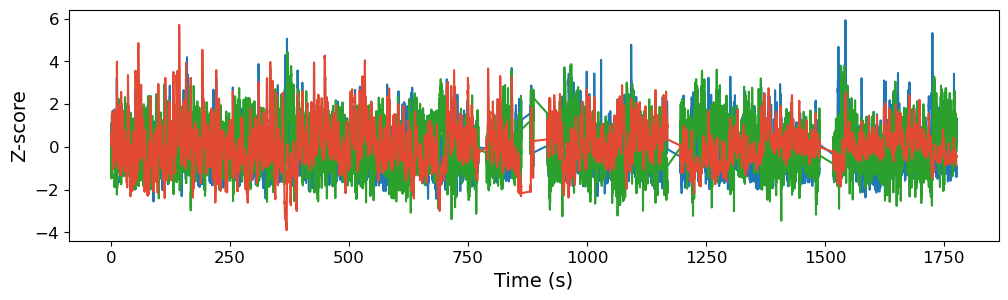

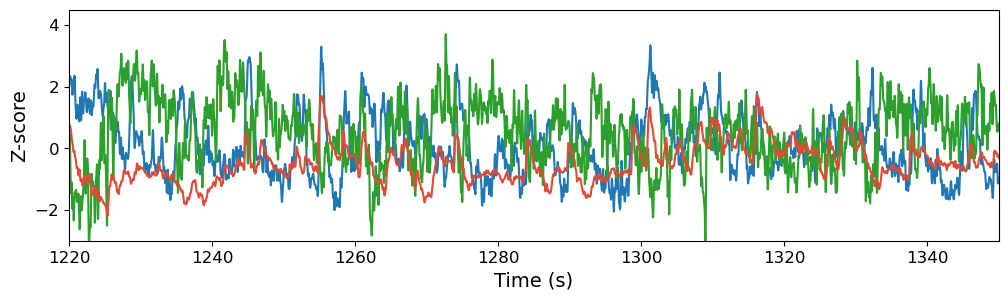

In [14]:
# Plot indicators overlayed

fig, ax1 = plt.subplots()
fig.set_size_inches(12, 3)
# Plot Ca and ACh on the first y-axis
ax1.plot(time_Ca-time_Ca[0], Ca_F2_zscore, color='#1f77b4')
ax1.plot(time_Ach-time_Ach[0], Ach_F2_zscore, color='#2ca02c')
ax1.plot(time_Da-time_Da[0], Da_F2_zscore, color='#e34a33')
ax1.set_xlabel('Time (s)', fontsize=14)
ax1.set_ylabel('Z-score', color='black', fontsize=14)
ax1.tick_params('y', color='black', labelsize=12)
ax1.tick_params('x', labelsize=12)
plt.show()

fig, ax1 = plt.subplots()
fig.set_size_inches(12, 3)
# Plot Ca and ACh on the first y-axis
ax1.plot(time_Ca-time_Ca[0], Ca_F2_lowpass, color='#1f77b4')
ax1.plot(time_Ach-time_Ach[0], Ach_F2_lowpass, color='#2ca02c')
ax1.plot(time_Da-time_Da[0], Da_F2_lowpass, color='#e34a33')
ax1.set_xlabel('Time (s)', fontsize=14)
ax1.set_ylabel('Z-score', color='black', fontsize=14)
ax1.tick_params('y', color='black', labelsize=12)
ax1.tick_params('x', labelsize=12)
# # Create a second y-axis for Da
# ax2 = ax1.twinx()
# ax2.plot(time_Da-time_Da[0], Da_F2_deltaF_F, color='#e34a33')
# ax2.set_ylabel('Delta F/F', color='#e34a33', fontsize=14)
# ax2.tick_params('y', color='#e34a33', labelsize=12)
#plt.xlim(0,1500)
plt.show()

fig, ax1 = plt.subplots()
fig.set_size_inches(12, 3)
# Plot Ca and ACh on the first y-axis
ax1.plot(time_Ca-time_Ca[0], Ca_F2_lowpass_2, color='#1f77b4')
ax1.plot(time_Ach-time_Ach[0], Ach_F2_lowpass_2, color='#2ca02c')
ax1.plot(time_Da-time_Da[0], Da_F2_lowpass_2, color='#e34a33')
ax1.set_xlabel('Time (s)', fontsize=14)
ax1.set_ylabel('Z-score', color='black', fontsize=14)
ax1.tick_params('y', color='black', labelsize=12)
ax1.tick_params('x', labelsize=12)
ax1.set_ylim(-3,4.5)
# # Create a second y-axis for Da
# ax2 = ax1.twinx()
# ax2.plot(time_Da-time_Da[0], Da_F2_deltaF_F, color='#e34a33')
# ax2.set_ylabel('Delta F/F', color='#e34a33', fontsize=14)
# ax2.tick_params('y', color='#e34a33', labelsize=12)
plt.xlim(1220,1350)
# plt.xlim()
plt.show()


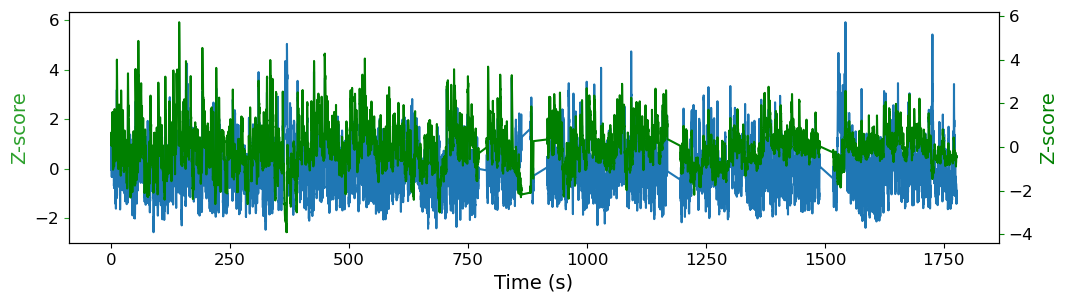

(241,)


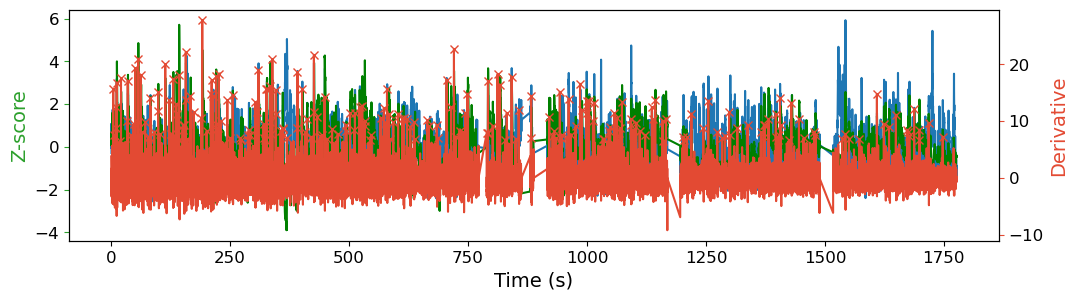

In [15]:
# Find activity increases in the signals

# # Make all time vectors same length
# time_Ca = time_Ca[0:40000]
# time_Ach = time_Ach[0:40000]
# time_Da = time_Da[0:40000]
# Ca_F1 = Ca_F1[0:40000]
# Ca_F2 = Ca_F2[0:40000]
# Ach_F1 = Ach_F1[0:40000]
# Ach_F2 = Ach_F2[0:40000]
# Da_F1 = Da_F1[0:40000]
# Da_F2 = Da_F2[0:40000]


# # Normalize the signals
# def normalize_signal(signal):
#     signal_norm = (signal - np.mean(signal))/np.std(signal)
#     return signal_norm

# Ca_F1_norm = normalize_signal(Ca_F1)
# Ca_F2_norm = normalize_signal(Ca_F2)
# Ach_F1_norm = normalize_signal(Ach_F1)
# Ach_F2_norm = normalize_signal(Ach_F2)
# Da_F1_norm = normalize_signal(Da_F1)
# Da_F2_norm = normalize_signal(Da_F2)

# Plot normalized signals
fig, ax1 = plt.subplots()
fig.set_size_inches(12, 3)
# Plot Ca and ACh on the first y-axis
ax1.plot(time_Ca-time_Ca[0], Ca_F2_lowpass_2, color='#1f77b4')
ax1.set_xlabel('Time (s)', fontsize=14)
ax1.set_ylabel('Z-score', color='#2ca02c', fontsize=14)
ax1.tick_params('y', color='#2ca02c', labelsize=12)
ax1.tick_params('x', labelsize=12)
# Create a second y-axis for Da
ax2 = ax1.twinx()
ax2.plot(time_Da-time_Da[0], Da_F2_lowpass_2, color='green')
ax2.set_ylabel('Z-score', color='green', fontsize=14)
ax2.tick_params('y', color='green', labelsize=12)
#plt.xlim(0,100)
plt.show()


# Compute the first derivative
derivative = np.diff(Da_F2_lowpass_2) / np.diff(time_Da)
# Adjust time vector for derivative
time_derivative = time_Da[:-1]

threshold_multiplier = 3  # Adjust based on desired sensitivity
threshold = threshold_multiplier * np.std(derivative)

from scipy.signal import find_peaks
peaks, _ = find_peaks(derivative, height=threshold)
print(peaks.shape)
# Get the corresponding times
spike_times = time_derivative[peaks]

fig, ax1 = plt.subplots()
fig.set_size_inches(12, 3)
# Plot Ca and ACh on the first y-axis
ax1.plot(time_Ca-time_Ca[0], Ca_F2_lowpass_2, color='#1f77b4')
ax1.plot(time_Da-time_Da[0], Da_F2_lowpass_2, color='green')
ax1.set_xlabel('Time (s)', fontsize=14)
ax1.set_ylabel('Z-score', color='#2ca02c', fontsize=14)
ax1.tick_params('y', color='#2ca02c', labelsize=12)
ax1.tick_params('x', labelsize=12)
# Create a second y-axis for Da
ax2 = ax1.twinx()
ax2.plot(time_derivative-time_derivative[0], derivative, color='#e34a33')
ax2.plot(spike_times-time_derivative[0], derivative[peaks], 'x', color='#e34a33')
ax2.set_ylabel('Derivative', color='#e34a33', fontsize=14)
ax2.tick_params('y', color='#e34a33', labelsize=12)
#plt.xlim(0,200)
plt.show()


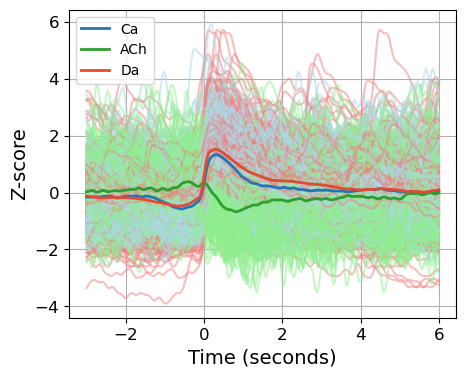

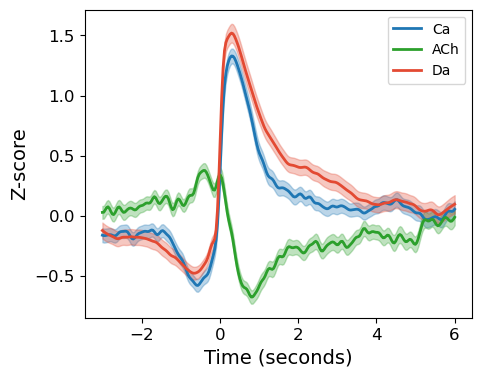

In [17]:
# Define the time window around each spike
pre_spike_time = 3  # seconds before the spike
post_spike_time = 6  # seconds after the spike

# List to store the extracted segments
segments_Ca = []
segments_Ach = []
segments_Da = []
# Calculate sampling interval
sampling_interval = np.mean(np.diff(time_Ca))  # Average time between samples
# Number of points in each segment
segment_length = int((pre_spike_time + post_spike_time) / sampling_interval)
segment_time = np.linspace(-pre_spike_time, post_spike_time, segment_length)

for spike_time in spike_times:
    # Find the index of the spike time in the time vector
    spike_index = np.searchsorted(time_Ca, spike_time)
    
    # Determine the indices for the segment
    start_index = spike_index - int(pre_spike_time / sampling_interval)
    end_index = spike_index + int(post_spike_time / sampling_interval)
    
    # Handle edge cases where indices are out of bounds
    if start_index < 0 or end_index > len(Ca_F2_lowpass_2):
        continue  # Skip this spike if the segment goes out of bounds
    
    # Extract the segment
    segment_Ca = Ca_F2_lowpass_2[start_index:end_index]
    segment_Ach = Ach_F2_lowpass_2[start_index:end_index]
    segment_Da = Da_F2_lowpass_2[start_index:end_index]
    
    # Store the segment
    segments_Ca.append(segment_Ca)
    segments_Ach.append(segment_Ach)
    segments_Da.append(segment_Da)

# Convert the list of segments to a numpy array
segments_array_Ca = np.array(segments_Ca)
segments_array_Ach = np.array(segments_Ach)
segments_array_Da = np.array(segments_Da)

plt.figure(figsize=(5, 4))
# Plot individual segments
#segment_time = segment_time[1:]  # Remove the first time point to match the length of the segments
for segment in range(len(segments_array_Ca)):
    plt.plot(segment_time, segments_array_Ca[segment], color='lightblue', alpha=0.5)
    plt.plot(segment_time, segments_array_Ach[segment], color='lightgreen', alpha=0.5)
    plt.plot(segment_time, segments_array_Da[segment], color='lightcoral', alpha=0.5)
# Compute and plot the average trace
mean_trace_Ca = np.mean(segments_array_Ca, axis=0)
mean_trace_Ach = np.mean(segments_array_Ach, axis=0)
mean_trace_Da = np.mean(segments_array_Da, axis=0)
plt.plot(segment_time, mean_trace_Ca, color='#1f77b4', label='Ca', linewidth=2)
plt.plot(segment_time, mean_trace_Ach, color='#2ca02c', label='ACh', linewidth=2)
plt.plot(segment_time, mean_trace_Da, color='#e34a33', label='Da', linewidth=2)
# Add labels and legend
plt.xlabel('Time (seconds)', fontsize=14)
plt.ylabel('Z-score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Plot the mean and ste of the segments
plt.figure(figsize=(5, 4))
# Compute the standard error of the mean of the segments
sem_trace_Ca = np.std(segments_array_Ca, axis=0) / np.sqrt(len(segments_array_Ca))
sem_trace_Ach = np.std(segments_array_Ach, axis=0) / np.sqrt(len(segments_array_Ach))
sem_trace_Da = np.std(segments_array_Da, axis=0) / np.sqrt(len(segments_array_Da))
# Plot the mean traces
plt.plot(segment_time, mean_trace_Ca, color='#1f77b4', label='Ca', linewidth=2)
plt.plot(segment_time, mean_trace_Ach, color='#2ca02c', label='ACh', linewidth=2)
plt.plot(segment_time, mean_trace_Da, color='#e34a33', label='Da', linewidth=2)
# Plot the standard error of the mean as shaded regions
plt.fill_between(segment_time, mean_trace_Ca - sem_trace_Ca, mean_trace_Ca + sem_trace_Ca, color='#1f77b4', alpha=0.3)
plt.fill_between(segment_time, mean_trace_Ach - sem_trace_Ach, mean_trace_Ach + sem_trace_Ach, color='#2ca02c', alpha=0.3)
plt.fill_between(segment_time, mean_trace_Da - sem_trace_Da, mean_trace_Da + sem_trace_Da, color='#e34a33', alpha=0.3)
# Add labels and legend
plt.xlabel('Time (seconds)', fontsize=14)
plt.ylabel('Z-score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()


